In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
file_path = "E0.csv"

data = pd.read_csv(file_path)

print(data.head())

  Div        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  16/08/2024  20:00  Man United       Fulham     1     0   H     0     0   
1  E0  17/08/2024  12:30     Ipswich    Liverpool     0     2   A     0     0   
2  E0  17/08/2024  15:00     Arsenal       Wolves     2     0   H     1     0   
3  E0  17/08/2024  15:00     Everton     Brighton     0     3   A     0     1   
4  E0  17/08/2024  15:00   Newcastle  Southampton     1     0   H     1     0   

   ... B365CAHH B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
0  ...     1.86     2.07   1.83   2.11     1.88     2.11     1.82     2.05   
1  ...     2.05     1.88   2.04   1.90     2.20     2.00     1.99     1.88   
2  ...     2.02     1.91   2.00   1.90     2.05     1.93     1.99     1.87   
3  ...     1.87     2.06   1.86   2.07     1.92     2.10     1.83     2.04   
4  ...     1.87     2.06   1.88   2.06     1.89     2.10     1.82     2.05   

   BFECAHH  BFECAHA  
0     1.90     2.08  


In [43]:
outcome_counts = data['FTR'].value_counts()
total_matches = len(data)
outcome_percentages = (outcome_counts / total_matches) * 100

print("Match Outcome Distribution:")
print(outcome_counts)
print("Outcome Percentages (%):")
print(outcome_percentages)

Match Outcome Distribution:
FTR
H    50
A    37
D    33
Name: count, dtype: int64
Outcome Percentages (%):
FTR
H    41.666667
A    30.833333
D    27.500000
Name: count, dtype: float64


In [44]:
home_wins = data[data['FTR'] == 'H']
away_wins = data[data['FTR'] == 'A']
draws = data[data['FTR'] == 'D']

avg_home_odds = home_wins['B365H'].mean()
avg_away_odds = home_wins['B365A'].mean()
avg_draw_odds = home_wins['B365D'].mean()

print("\nAverage Odds for Each Outcome:")
print(f"Home Win: {avg_home_odds:.2f}")
print(f"Away Win: {avg_away_odds:.2f}")
print(f"Draw: {avg_draw_odds:.2f}")

print("\nBetting odds in percentages")
print(f"Home odds {100/avg_home_odds:.2f}")
print(f"Away odds {100/avg_away_odds:.2f}")
print(f"Draw odds {100/avg_draw_odds:.2f}")
print("Implied Vig")
print(f"Vig {100-(100/avg_home_odds + 100/avg_away_odds + 100/avg_draw_odds):.2f}%")


Average Odds for Each Outcome:
Home Win: 2.08
Away Win: 5.82
Draw: 4.82

Betting odds in percentages
Home odds 48.13
Away odds 17.17
Draw odds 20.74
Implied Vig
Vig 13.96%


In [45]:
home_upsets = home_wins[home_wins['B365H'] > 3.0]

home_upsets_sorted = home_upsets.sort_values(by='B365H', ascending=False)

away_upsets = away_wins[away_wins['B365A'] > 3.0]

away_upsets_sorted = away_upsets.sort_values(by='B365A', ascending=False)


print("\n", home_upsets_sorted[['HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'Date']])
print("\n", away_upsets_sorted[['HomeTeam', 'AwayTeam', 'FTR', 'B365A', 'Date']])

upset_count = len(home_upsets) + len(away_upsets)
upset_percentage = (upset_count / total_matches) * 100

print(f"\nNumber of upsets (Odds > 3.0): {upset_count}")
print(f"Upset Percentage: {upset_percentage:.2f}%")





            HomeTeam     AwayTeam FTR  B365H        Date
91      Bournemouth     Man City   H   5.50  02/11/2024
76      Bournemouth      Arsenal   H   5.00  19/10/2024
104        Brighton     Man City   H   4.10  09/11/2024
87   Crystal Palace    Tottenham   H   3.90  27/10/2024
90        Newcastle      Arsenal   H   3.75  02/11/2024
63        Leicester  Bournemouth   H   3.10  05/10/2024

            HomeTeam       AwayTeam FTR  B365A        Date
34        Liverpool  Nott'm Forest   A  12.00  14/09/2024
108       Tottenham        Ipswich   A   9.00  10/11/2024
116        Man City      Tottenham   A   6.00  23/11/2024
119       Newcastle       West Ham   A   6.00  25/11/2024
115          Fulham         Wolves   A   5.25  23/11/2024
74        Newcastle       Brighton   A   3.60  19/10/2024
11   Crystal Palace       West Ham   A   3.20  24/08/2024

Number of upsets (Odds > 3.0): 13
Upset Percentage: 10.83%


In [46]:
upsets = pd.concat([
    home_upsets[['HomeTeam', 'AwayTeam', 'B365H', 'FTR', 'Date']], 
    away_upsets[['HomeTeam', 'AwayTeam', 'B365A', 'FTR', 'Date']]
])

upsets['Odds'] = upsets['B365H'].fillna(upsets['B365A'])

upsets['OddsType'] = upsets.apply(
    lambda row: 'Home Odds' if pd.notna(row['B365H']) else 'AwayOdds', axis=1
)

upsets_sorted = upsets.sort_values(by='Odds', ascending=False)

print(upsets_sorted[['HomeTeam', 'AwayTeam', 'Odds', 'OddsType', 'FTR', 'Date']])

           HomeTeam       AwayTeam   Odds   OddsType FTR        Date
34        Liverpool  Nott'm Forest  12.00   AwayOdds   A  14/09/2024
108       Tottenham        Ipswich   9.00   AwayOdds   A  10/11/2024
116        Man City      Tottenham   6.00   AwayOdds   A  23/11/2024
119       Newcastle       West Ham   6.00   AwayOdds   A  25/11/2024
91      Bournemouth       Man City   5.50  Home Odds   H  02/11/2024
115          Fulham         Wolves   5.25   AwayOdds   A  23/11/2024
76      Bournemouth        Arsenal   5.00  Home Odds   H  19/10/2024
104        Brighton       Man City   4.10  Home Odds   H  09/11/2024
87   Crystal Palace      Tottenham   3.90  Home Odds   H  27/10/2024
90        Newcastle        Arsenal   3.75  Home Odds   H  02/11/2024
74        Newcastle       Brighton   3.60   AwayOdds   A  19/10/2024
11   Crystal Palace       West Ham   3.20   AwayOdds   A  24/08/2024
63        Leicester    Bournemouth   3.10  Home Odds   H  05/10/2024


In [47]:
favourite = data
favourite['Favourite'] = favourite[['B365H', 'B365D', 'B365A']].idxmin(axis=1)
favourite['FavouriteWon'] = ((data['Favourite'] == 'B365H') & (data['FTR'] == 'H')) | \
                            ((data['Favourite'] == 'B365A') & (data['FTR'] == 'A'))
favourite_win_percentage = (data['FavouriteWon'].sum() / total_matches) * 100
draw_percentage = (data['FTR'] == 'D').sum() / total_matches * 100
favourite_loss_percentage = ((data['FavouriteWon'] == False) & (data['FTR'] != 'D')).sum() /total_matches * 100
print(f"\nPercentage of Matches Where the Favorite Won: {favourite_win_percentage:.2f}%")
print(f"Percentage of Matches that Were a Draw: {draw_percentage:.2f}%")
print(f"Percentage of Matches Where the Favorite Lost: {favourite_loss_percentage:.2f}%")


Percentage of Matches Where the Favorite Won: 50.00%
Percentage of Matches that Were a Draw: 27.50%
Percentage of Matches Where the Favorite Lost: 22.50%


In [48]:
total_home_goals = data['FTHG'].sum()
total_away_goals = data['FTAG'].sum()

total_goals = total_home_goals + total_away_goals

average_home_goals = total_home_goals / total_matches
average_away_goals = total_away_goals / total_matches 
average_all_goals = total_goals / total_matches 

print(f"Total Goals: {total_goals}")
print(f"Average Goals per Match: {average_all_goals:.2f}")
print(f"Total Home Goals: {total_home_goals}")
print(f"Average Home Goals per Match: {average_home_goals:.2f}")
print(f"Total Away Goals: {total_away_goals}")
print(f"Average Away Goals per Match: {average_away_goals:.2f}")
print(f"Imagined average goals each side: {average_all_goals/2:.2f}")
fewer_scored_away = (average_all_goals/2) - average_away_goals
print(f"Fewer away goals scored: {fewer_scored_away:.2f}")
more_scored_home = average_home_goals - (average_all_goals/2)
print(f"More home goals scored: {more_scored_home:.2f}")
print(f"Total Home Away Goal Swing: {more_scored_home + fewer_scored_away:.2f}")

Total Goals: 345
Average Goals per Match: 2.88
Total Home Goals: 181
Average Home Goals per Match: 1.51
Total Away Goals: 164
Average Away Goals per Match: 1.37
Imagined average goals each side: 1.44
Fewer away goals scored: 0.07
More home goals scored: 0.07
Total Home Away Goal Swing: 0.14


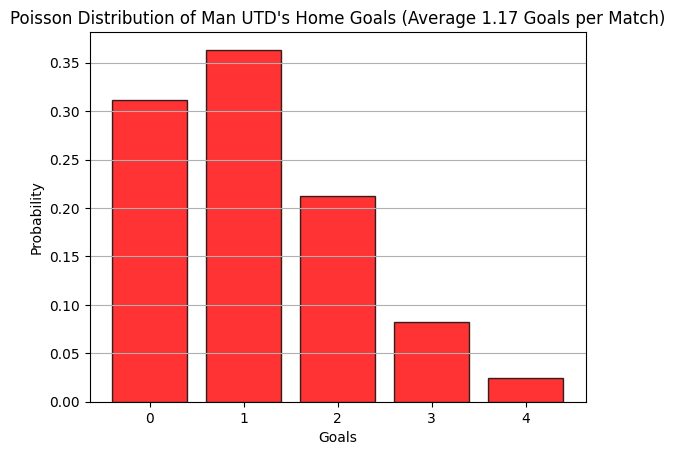

In [49]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt


manchesterUTD_home_goals = data[data['HomeTeam'] == 'Man United']['FTHG']

manchesterUTD_average_home_goals = manchesterUTD_home_goals.mean()

goal_range = np.arange(0, 5)

poisson_probs = poisson.pmf(goal_range, manchesterUTD_average_home_goals)

plt.bar(goal_range, poisson_probs, alpha=0.8, color='red', edgecolor='black')
plt.title(f"Poisson Distribution of Man UTD's Home Goals (Average {manchesterUTD_average_home_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

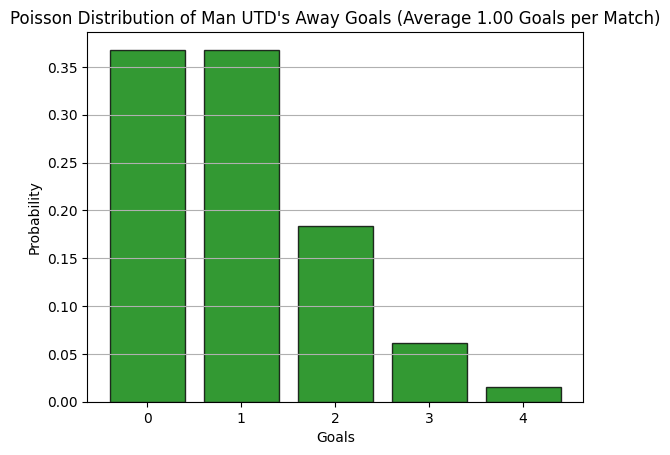

In [50]:
manchesterUTD_away_goals = data[data['AwayTeam'] == 'Man United']['FTAG']

manchesterUTD_average_away_goals = manchesterUTD_away_goals.mean()

goal_range = np.arange(0, 5)

poisson_probs = poisson.pmf(goal_range, manchesterUTD_average_away_goals)

plt.bar(goal_range, poisson_probs, alpha=0.8, color='green', edgecolor='black')
plt.title(f"Poisson Distribution of Man UTD's Away Goals (Average {manchesterUTD_average_away_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

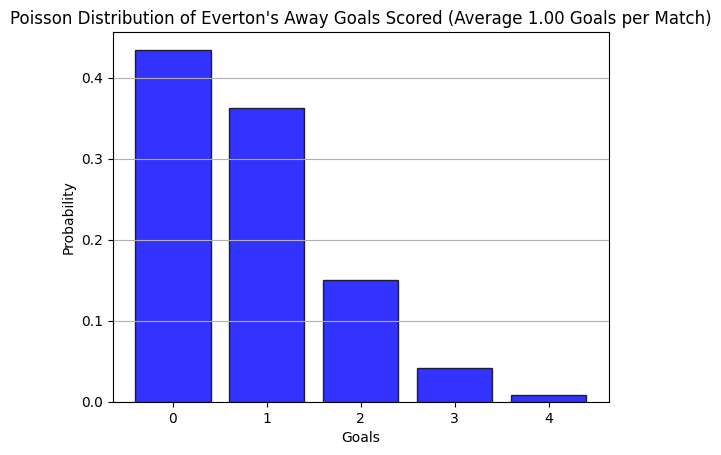

In [51]:
everton_away_goals = data[data['AwayTeam'] == 'Everton']['FTAG']

everton_average_away_goals = everton_away_goals.mean()

goal_range = np.arange(0, 5)

poisson_probs = poisson.pmf(goal_range, everton_average_away_goals)

plt.bar(goal_range, poisson_probs, alpha=0.8, color='blue', edgecolor='black')
plt.title(f"Poisson Distribution of Everton's Away Goals Scored (Average {manchesterUTD_average_away_goals:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

0      0
29     3
58     3
73     1
98     1
106    0
Name: FTAG, dtype: int64


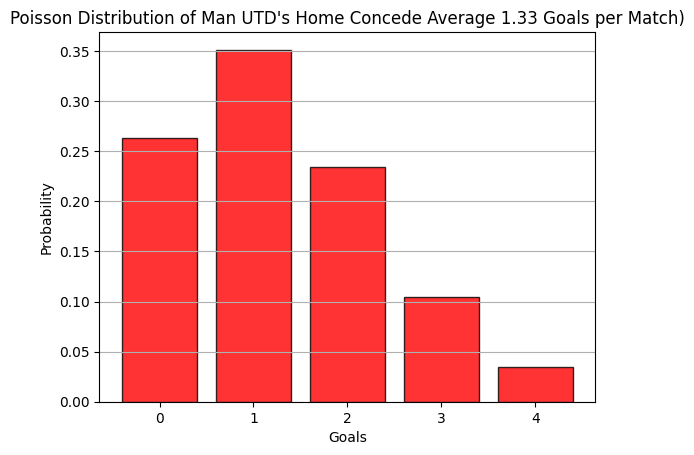

In [52]:
manchesterUTD_home_concede = data[data['HomeTeam'] == 'Man United']['FTAG']

print(manchesterUTD_home_concede)

manchesterUTD_average_home_concede = manchesterUTD_home_concede.mean()

goal_range = np.arange(0, 5)

poisson_probs = poisson.pmf(goal_range, manchesterUTD_average_home_concede)

plt.bar(goal_range, poisson_probs, alpha=0.8, color='red', edgecolor='black')
plt.title(f"Poisson Distribution of Man UTD's Home Concede Average {manchesterUTD_average_home_concede:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

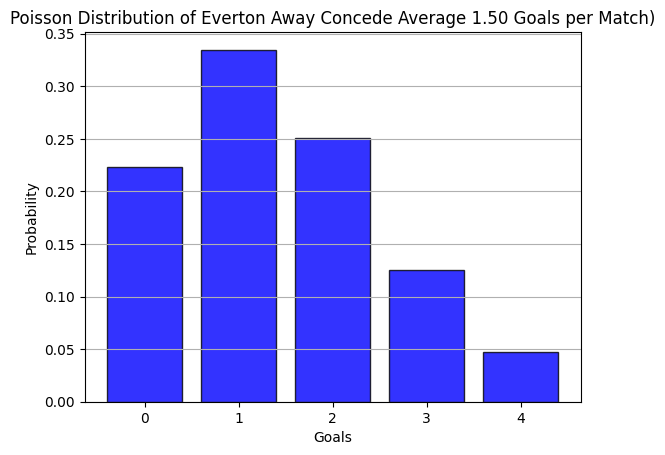

In [53]:
everton_away_concede = data[data['AwayTeam'] == 'Everton']['FTHG']


everton_average_away_concede = everton_away_concede.mean()

goal_range = np.arange(0, 5)

poisson_probs = poisson.pmf(goal_range, everton_average_away_concede)

plt.bar(goal_range, poisson_probs, alpha=0.8, color='blue', edgecolor='black')
plt.title(f"Poisson Distribution of Everton Away Concede Average {everton_average_away_concede:.2f} Goals per Match)")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.xticks(goal_range)
plt.grid(axis='y')
plt.show()

Probability of Man United winning: 52.11%
Probability of Everton winning: 24.08%
Probability of a draw: 23.57%
Total Probability: 99.76%


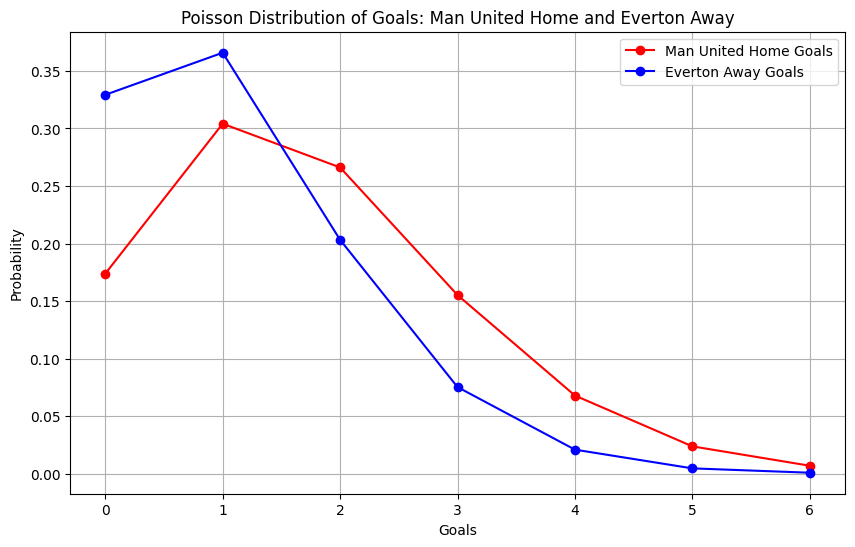

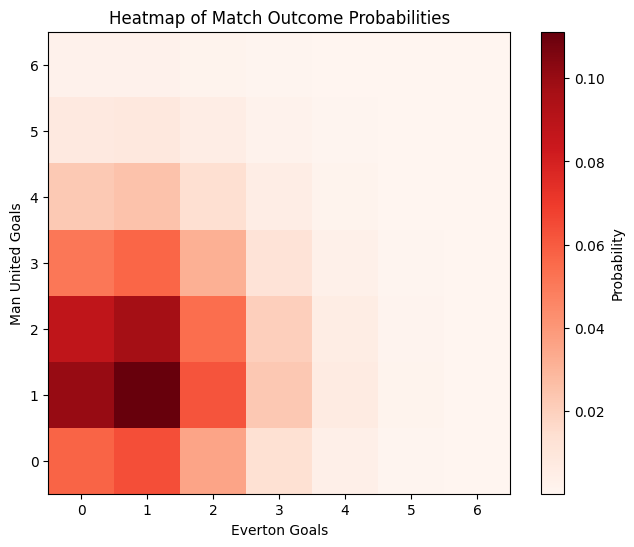

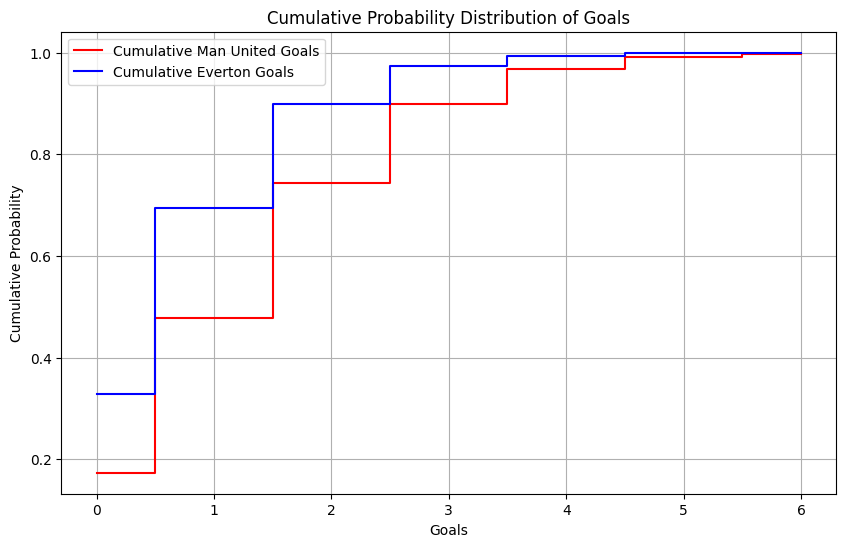

In [72]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

#google gives: H: 62% A: 16% D: 22%

# Collect data for two teams
manchesterUTD_home_data = data[data['HomeTeam'] == 'Man United']
everton_away_data = data[data['AwayTeam'] == 'Everton']

# Calculate man utd home goals scored and conceded
manchesterUTD_home_goals_scored = manchesterUTD_home_data['FTHG'].sum()
manchesterUTD_home_goals_conceded = manchesterUTD_home_data['FTAG'].sum()
manchesterUTD_home_games = len(manchesterUTD_home_data)

# Everton away score and concede
everton_away_goals_scored = everton_away_data['FTAG'].sum()
everton_away_concede = everton_away_data['FTHG'].sum()
everton_away_matches = len(everton_away_data)

# print(manchesterUTD_home_goals_scored, manchesterUTD_home_goals_conceded)
# print(everton_away_goals_scored, everton_away_concede)

#Calculate averages
manchesterUTD_average_home_goals = manchesterUTD_home_goals_scored / manchesterUTD_home_games
manchesterUTD_average_home_concede = manchesterUTD_home_goals_conceded / manchesterUTD_home_games

everton_average_away_goals = everton_away_goals_scored / everton_away_matches
everton_average_away_concede = everton_away_concede / everton_away_matches

# Calculate expected goals for each
manchesterUTD_expeted_goals = manchesterUTD_average_home_goals * everton_average_away_concede
everton_expected_goals = everton_average_away_goals * manchesterUTD_average_home_concede

# print(manchesterUTD_expeted_goals, everton_expected_goals)

# Set the range
goal_range = np.arange(0, 7)

# Calculate Poisson distribution
manchesterUTD_home_probs = poisson.pmf(goal_range, manchesterUTD_expeted_goals)
everton_away_probs = poisson.pmf(goal_range, everton_expected_goals)

# Calculate probabilities of each element of distribution (H A D)
manchesterUTD_win_prob = 0
everton_win_prob = 0
draw_prob = 0

outcome_probs = np.zeros((len(goal_range), len(goal_range)))  # For heatmap


for manchesterUTD_goals in goal_range:
    for everton_goals in goal_range:
        prob = manchesterUTD_home_probs[manchesterUTD_goals] * everton_away_probs[everton_goals]
        outcome_probs[manchesterUTD_goals, everton_goals] = prob  # Save for heatmap
        if manchesterUTD_goals > everton_goals:
            manchesterUTD_win_prob += prob
        elif manchesterUTD_goals == everton_goals:
            draw_prob += prob
        else:
            everton_win_prob += prob
            
# Output probabilities
print(f"Probability of Man United winning: {manchesterUTD_win_prob*100:.2f}%")
print(f"Probability of Everton winning: {everton_win_prob*100:.2f}%")
print(f"Probability of a draw: {draw_prob*100:.2f}%")
print(f"Total Probability: {(draw_prob*100)+(everton_win_prob*100)+(manchesterUTD_win_prob*100):.2f}%")

# ====== PLOTS ======

# 1. Poisson Distribution for Man United and Everton
plt.figure(figsize=(10, 6))
plt.plot(goal_range, manchesterUTD_home_probs, label="Man United Home Goals", color='red', marker='o')
plt.plot(goal_range, everton_away_probs, label="Everton Away Goals", color='blue', marker='o')
plt.title('Poisson Distribution of Goals: Man United Home and Everton Away')
plt.xlabel('Goals')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
# plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 7, 1))
plt.show()

# Heatmap of outcome probabilities

plt.figure(figsize=(8, 6))
plt.imshow(outcome_probs, cmap="Reds", origin="lower")
plt.colorbar(label="Probability")
plt.title("Heatmap of Match Outcome Probabilities")
plt.xlabel("Everton Goals")
plt.ylabel("Man United Goals")
plt.xticks(ticks=np.arange(len(goal_range)), labels=goal_range)
plt.yticks(ticks=np.arange(len(goal_range)), labels=goal_range)
plt.show()

# Cumulative Probability Distribution for Man United and Everton
man_united_cumulative_probs = np.cumsum(manchesterUTD_home_probs)
everton_cumulative_probs = np.cumsum(everton_away_probs)

plt.figure(figsize=(10, 6))
plt.step(goal_range, man_united_cumulative_probs, label="Cumulative Man United Goals", color="Red", where="mid")
plt.step(goal_range, everton_cumulative_probs, label="Cumulative Everton Goals", color="Blue", where="mid")
plt.title("Cumulative Probability Distribution of Goals")
plt.xlabel('Goals')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

Probability of Liverpool winning: 67.37%
Probability of Man City winning: 13.41%
Probability of a draw: 19.21%


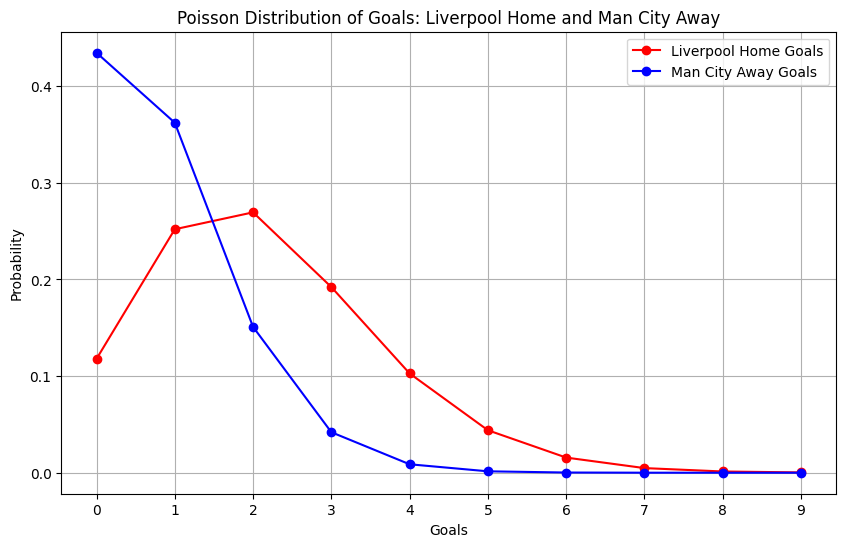

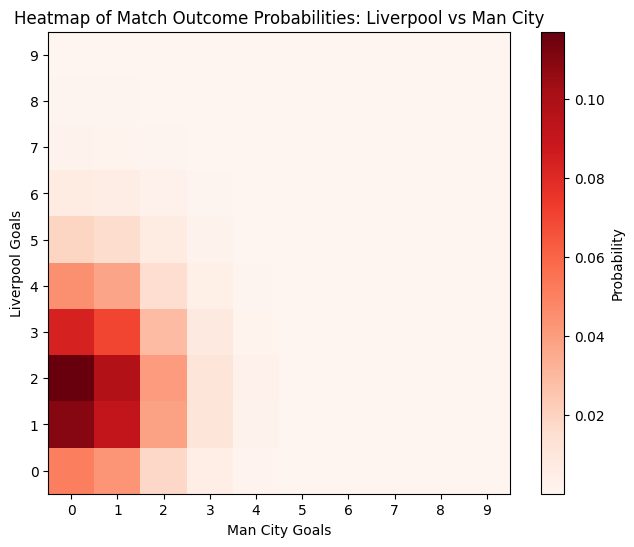

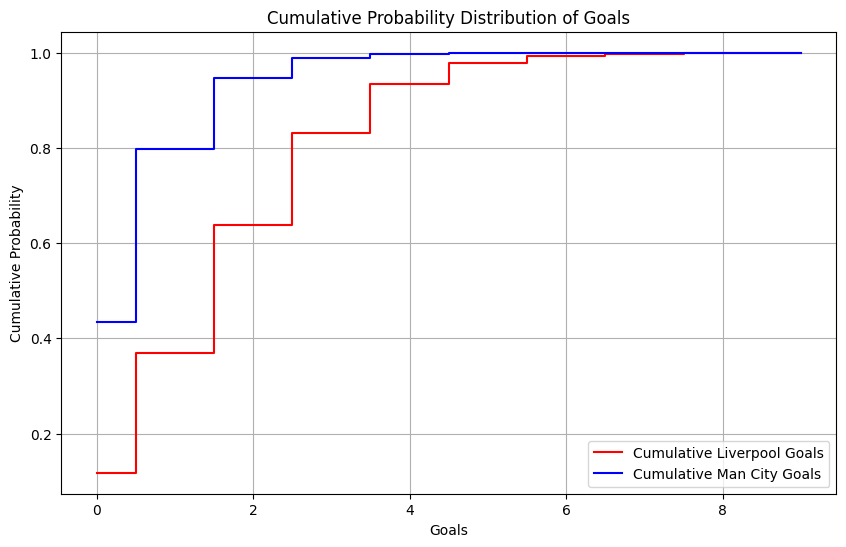

In [88]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

def plot_team_probabilities(data, home_team, away_team):

    # Data for the home and away teams
    home_team_data = data[data['HomeTeam'] == home_team]
    away_team_data = data[data['AwayTeam'] == away_team]

    # Calculate home team goals scored and conceded
    home_team_goals_scored = home_team_data['FTHG'].sum()
    home_team_goals_conceded = home_team_data['FTAG'].sum()
    home_team_games = len(home_team_data)

    # Away team goals scored and conceded
    away_team_goals_scored = away_team_data['FTAG'].sum()
    away_team_goals_conceded = away_team_data['FTHG'].sum()
    away_team_matches = len(away_team_data)

    # Calculate averages
    home_team_avg_goals = home_team_goals_scored / home_team_games
    home_team_avg_concede = home_team_goals_conceded / home_team_games

    away_team_avg_goals = away_team_goals_scored / away_team_matches
    away_team_avg_concede = away_team_goals_conceded / away_team_matches

    # Calculate expected goals for each team
    home_team_expected_goals = home_team_avg_goals * away_team_avg_concede
    away_team_expected_goals = away_team_avg_goals * home_team_avg_concede

    # Set the goal range for the distribution
    goal_range = np.arange(0, 10)

    # Calculate Poisson distribution
    home_team_probs = poisson.pmf(goal_range, home_team_expected_goals)
    away_team_probs = poisson.pmf(goal_range, away_team_expected_goals)

    # Calculate probabilities of each outcome (win, draw, lose)
    home_team_win_prob = 0
    away_team_win_prob = 0
    draw_prob = 0

    outcome_probs = np.zeros((len(goal_range), len(goal_range)))  # For heatmap

    for home_goals in goal_range:
        for away_goals in goal_range:
            prob = home_team_probs[home_goals] * away_team_probs[away_goals]
            outcome_probs[home_goals, away_goals] = prob  # Save for heatmap
            if home_goals > away_goals:
                home_team_win_prob += prob
            elif home_goals == away_goals:
                draw_prob += prob
            else:
                away_team_win_prob += prob

    # Output probabilities
    print(f"Probability of {home_team} winning: {home_team_win_prob*100:.2f}%")
    print(f"Probability of {away_team} winning: {away_team_win_prob*100:.2f}%")
    print(f"Probability of a draw: {draw_prob*100:.2f}%")

    # ====== PLOTS ======

    # 1. Poisson Distribution for Home and Away Teams
    plt.figure(figsize=(10, 6))
    plt.plot(goal_range, home_team_probs, label=f"{home_team} Home Goals", color='red', marker='o')
    plt.plot(goal_range, away_team_probs, label=f"{away_team} Away Goals", color='blue', marker='o')
    plt.title(f'Poisson Distribution of Goals: {home_team} Home and {away_team} Away')
    plt.xlabel('Goals')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(0, 10, 1))
    plt.show()

    # Heatmap of outcome probabilities
    plt.figure(figsize=(8, 6))
    plt.imshow(outcome_probs, cmap="Reds", origin="lower")
    plt.colorbar(label="Probability")
    plt.title(f"Heatmap of Match Outcome Probabilities: {home_team} vs {away_team}")
    plt.xlabel(f"{away_team} Goals")
    plt.ylabel(f"{home_team} Goals")
    plt.xticks(ticks=np.arange(len(goal_range)), labels=goal_range)
    plt.yticks(ticks=np.arange(len(goal_range)), labels=goal_range)
    plt.show()

    # Cumulative Probability Distribution for Home and Away Teams
    home_team_cumulative_probs = np.cumsum(home_team_probs)
    away_team_cumulative_probs = np.cumsum(away_team_probs)

    plt.figure(figsize=(10, 6))
    plt.step(goal_range, home_team_cumulative_probs, label=f"Cumulative {home_team} Goals", color="Red", where="mid")
    plt.step(goal_range, away_team_cumulative_probs, label=f"Cumulative {away_team} Goals", color="Blue", where="mid")
    plt.title("Cumulative Probability Distribution of Goals")
    plt.xlabel('Goals')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

data = pd.read_csv(file_path)
plot_team_probabilities(data, 'Liverpool', 'Man City')
